Md Isahaq Ali 2017331065

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

#Simulation the digital-digital conversion techniques

1. (i) line encoding - unipolar nrz

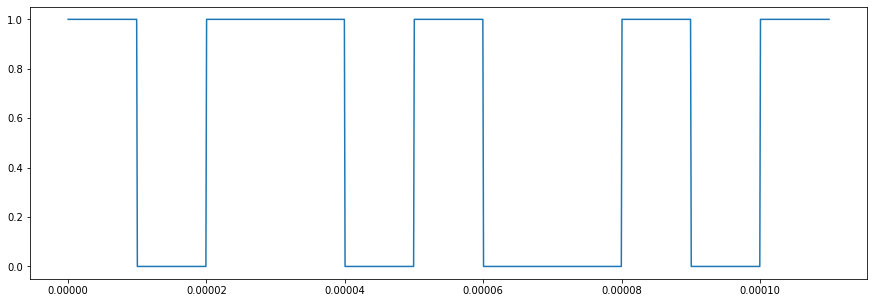

In [ ]:

bit = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1])  # input bit
timeData = 10e-6                                   # time per unit data element
bitRate = 1/timeData   
f=4                                 
fs = f*bitRate                                      # sampling frequency 
 
time = np.linspace(0,timeData,100)

bitlen = len(bit)                                  #bitlength

x = np.array([])
for i in range(bitlen):
  temp = bit[i]* np.ones(len(time))
  x = np.append(x, temp)
ts = np.linspace(0,bitlen*timeData,len(x))

plt.figure(figsize =(15, 5))
plt.plot(ts, x)

plt.show()

(ii) line decoding unipolar nrz


In [ ]:
output = []
c = 0
for i in range(len(ts)):
  if ts[i]*bitRate > c:
    c = c+ 1
    output.append(int(x[i]))

print(output)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]


# block coding 4B/5B

In [ ]:
mb = 4
nb = 5
code_mapping = {
"0000": "11110",
"0001": "01001",
"0010": "10100",
"0011": "10101",
"0100": "01010",
"0101": "01011",
"0110": "01110",
"0111": "01111",
"1000": "10010",
"1001": "10011",
"1010": "10110",
"1011": "10111",
"1100": "11010",
"1101": "11011",
"1110": "11100",
"1111": "11101",
"11110": "0000",
"01001": "0001",
"10100": "0010",
"10101": "0011",
"01010": "0100",
"01011": "0101",
"01110": "0110",
"01111": "0111",
"10010": "1000",
"10011": "1001",
"10110": "1010",
"10111": "1011",
"11010": "1100",
"11011": "1101",
"11100": "1110",
"11101": "1111"}




def get_mapped_code(bits):
    return code_mapping["".join(map(str,bits))]


  ##encode function

def get_mb_nb_encoding(bits,mb,nb):
  if len(bits) % mb != 0:
    extra_len = (((len(bits)// mb) + 1) * mb) - len(bits)
    extra = np.array(np.zeros(extra_len), dtype=int)
    bits = np.append(bits, extra)
  
  encoded_bits_str = ""
  for i in range(0, len(bits), mb):
    encoded_bits_str += get_mapped_code(bits[i:i+mb])
  encoded_bits_list = list(encoded_bits_str)
  encoded_bits_map = map(int, encoded_bits_list)
  encoded_bits = np.array(list(encoded_bits_map))
  return encoded_bits


##decode function

def get_nb_mb_decoding(bits, mb, nb):
  if len(bits) % nb != 0:
    print("decoding not possible")
    return
  decoded_bits_str = ""
  for i in range(0, len(bits), nb):
    decoded_bits_str += get_mapped_code(bits[i:i+nb])
  # Convert the decoded bit string to list of bits
  decoded_bits_list = list(decoded_bits_str)
  decoded_bits_map = map(int, decoded_bits_list)
  decoded_bits = np.array(list(decoded_bits_map))
  return decoded_bits


4B/5B encoding

In [ ]:

bits = np.array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int) 
bits = get_MB_NB_Encoding(bits, mB, nB)

NRZ-I line encoding

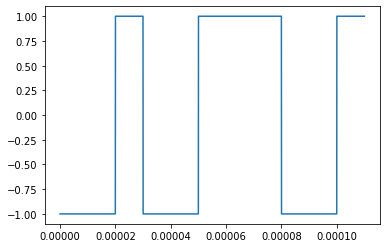

In [ ]:
Time = 10e-6   
bit_rate = 1/Time  
Fs = 4*bit_rate    
N = len(bits)   
T = np.linspace(0,Time, mB * 100)

x = np.array([])
last_bit = 1
for i in range(N):
  if bits[i] == 1:
    temp = (-1) * last_bit * np.ones(len(T))
    last_bit = -last_bit
  else:
    temp = last_bit * np.ones(len(T))
  x = np.append(x, temp)
t = np.linspace(0,N*Time,len(x))

plt.plot(t, x)
plt.show()


NRZ-I line coding decoding

In [ ]:
output = []
c = 0
last_bit = 1
for i in range(len(t)):
  if t[i]*bit_rate > counter:
    counter = c + 1
    if x[i] != last_bit:
      result.append(1)
      last_bit=-last_bit
    else:
      result.append(0)

print(result)

[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]


4B/5B decoding

In [ ]:
decode = get_nb_mb_decoding(res,mb,nb);
print(decode)